In [1]:
# Keras:
from keras.layers.core import Dense, Activation
from keras.utils import plot_model, np_utils
from keras.models import Sequential

# Base packages:
from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/RodolfoFerro/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data:
data = pd.read_csv("../data/Final_Results_Pupil_v2.csv", sep=";")

# Print first 5 rows:
data.head()

,Participant,World,TrialName,Task,Duration,Milliseconds,Errors,Baseline,APCPS,MPD,...,MPDC_A,SD_A,PeakDilation_A,Latencytopeak_A,Changeposition_A,Attempts_A,ChangepositionAttemps_A,Errorschangeposition_A,ErrorsAttemps_A,Totalerrors_A
0,1,2,2_5,25,00:00:45,44785,0,"30,7896",",0409","32,049",...,"2,9259","1,5489","6,0057",65,2,0,2,3,1,3
1,3,2,2_4,24,00:01:53,112464,1,"18,1298",",0524","19,0801",...,"2,3878","1,3852","4,9936",33,0,2,2,0,2,2
2,6,2,2_4,24,00:00:40,39458,0,"27,0984",",0869","29,4543",...,"2,2689",",8128","4,0133",9,0,0,0,0,0,0
3,6,2,2_5,25,00:00:46,45055,0,"29,3381",",0288","30,1824",...,"1,3159",",8638","3,0021",38,1,0,1,1,0,1
4,7,2,2_4,24,00:02:28,147727,7,"25,5965",",0839","27,745",...,"4,3299","1,0139","6,9429",14,0,0,0,0,0,0


In [3]:
# Create testing indices.
# Subjects: 1, 3, 20
test_idx = [0, 1, 22, 23, 24, 25, 49]
print("Testing indices:", test_idx)

Testing indices: [0, 1, 22, 23, 24, 25, 49]


In [4]:
def clean_data(data):
    """Utlity function to parse data."""
    for col in range(data.shape[1]):
        for row in range(data.shape[0]):
            try:
                data[row, col] = float(data[row, col].replace(',', '.'))
            except:
                pass

def one_hot_encode_object_array(arr):
    """One hot encode a numpy array of objects (e.g. strings)"""
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [5]:
# Create features and labels (data):
features = data[['Errors', 'Milliseconds', 'MPDC', 'PeakDilation']].values
labels = data[['World']].values
clean_data(features)

# Create features and labels (names):
feature_names = np.array(['Errors', 'Milliseconds', 'MPDC', 'PeakDilation'])
label_names = np.array(['World 1', 'World 2'])

# Create training data:
train_data = np.delete(features, test_idx, axis=0)
train_lbls = np.delete(labels, test_idx)

# Create testing data:
test_data = features[test_idx]
test_lbls = labels[test_idx]

# Rebuild labels data:
train_lbls_ohe = one_hot_encode_object_array(train_lbls)
test_lbls_ohe = one_hot_encode_object_array(test_lbls)

In [6]:
# Build model:
model = Sequential()
model.add(Dense(2, input_shape=(4,)))
model.add(Activation('sigmoid'))

# Compile and train model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(train_data, train_lbls_ohe, epochs=100, batch_size=1, verbose=0)

In [7]:
loss, accuracy = model.evaluate(test_data, test_lbls_ohe, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 57.14%


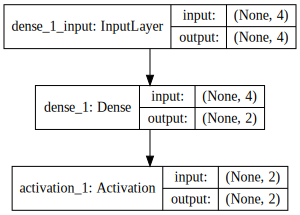

In [8]:
plot_model(model, to_file='../imgs/ANN.svg', show_shapes=True, show_layer_names=True) 
SVG("../imgs/ANN.svg")